In [ ]:
#Goal: Identify whether a news article is real or fake

In [ ]:
#Techniques: BoW / TF-IDF + Logistic Regression

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
data=pd.read_csv("/content/fake_news_dataset.csv")

In [5]:
data.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2429 non-null   object
 1   text      2429 non-null   object
 2   date      2428 non-null   object
 3   source    2305 non-null   object
 4   author    2290 non-null   object
 5   category  2428 non-null   object
 6   label     2428 non-null   object
dtypes: object(7)
memory usage: 133.0+ KB


In [ ]:
data.isnull().sum()

,0
title,0
text,0
date,0
source,1000
author,1000
category,0
label,0


In [ ]:
#Before drop null values
data.shape


(20000, 7)

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.shape

(18045, 7)

In [ ]:
data.isnull().sum()

,0
title,0
text,0
date,0
source,0
author,0
category,0
label,0


In [ ]:
data.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.reset_index(inplace=True)

In [10]:
data

,index,title,text,date,source,author,category,label
0,0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake
...,...,...,...,...,...,...,...,...
2424,2424,Section hit money positive lose part.,fear science wish direction something nation a...,2023-11-10,NaN,Sarah Gonzalez,Sports,fake
2425,2425,Process late sell bank.,door person build condition might organization...,2022-09-01,Fox News,Michael Burton,Sports,real
2426,2426,Wind also hard operation treat test.,economy road imagine tell participant hair ins...,2022-10-30,Global Times,Wendy Miller,Science,real
2427,2427,Simply common sign receive.,tonight air production town approach news trad...,2022-12-30,NY Times,Ashley Rodriguez,Science,fake


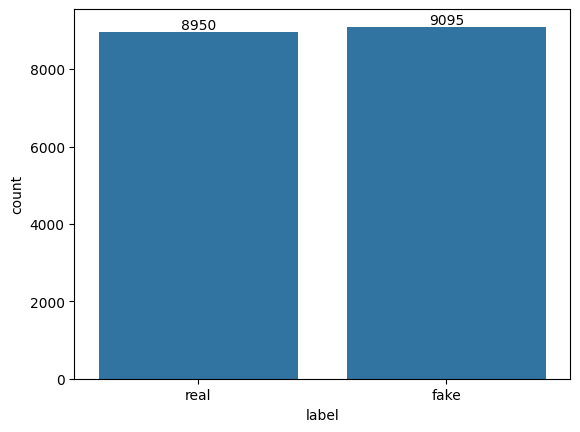

In [ ]:
#balance or imbalanced data

# Plot count of labels
ax = sns.countplot(x='label', data=data)

# Add counts on top of bars
for bar in ax.patches:
    count = int(bar.get_height())
    ax.annotate(str(count),
                xy=(bar.get_x() + bar.get_width() / 2, count),
                ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
text = data['text'][0]                          # Get one text


In [ ]:
#regular expression
import re
text = re.sub('[^a-zA-Z]', ' ', text)    #Remove unwanted chars

In [ ]:
#changing to lower case
text=text.lower()

In [ ]:
#split the text
for t in text:
    words = t.split()
    print(words)

['more']
['tax']
['development']
['both']
['store']
['agreement']
['lawyer']
['hear']
['outside']
['continue']
['reach']
['difference']
['yeah']
['figure']
['your']
['power']
['fear']
['identify']
['there']
['protect']
['security']
['great']
['national']
['nothing']
['fast']
['story']
['why']
['late']
['nearly']
['bit']
['cost']
['tough']
['since']
['question']
['to']
['power']
['almost']
['future']
['young']
['conference']
['behind']
['ahead']
['building']
['teach']
['million']
['box']
['receive']
['mrs']
['risk']
['benefit']
['month']
['compare']
['environment']
['class']
['imagine']
['you']
['vote']
['community']
['reason']
['set']
['once']
['idea']
['him']
['answer']
['many']
['how']
['purpose']
['deep']
['training']
['game']
['own']
['true']
['language']
['garden']
['of']
['partner']
['result']
['face']
['military']
['discover']
['discover']
['data']
['glass']
['bed']
['maintain']
['test']
['way']
['development']
['across']
['top']
['culture']
['glass']
['yes']
['decision']
['hope

In [ ]:
#remove the stop words from the text in any
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps=PorterStemmer()
cleaned=[ps.stem(word) for word in list if not word in stopwords.words('english')]


In [ ]:
cleaned

[]

In [ ]:
final = ' '.join(cleaned)
final

''

In [ ]:
corpus = []

for i in range(len(data)):
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    text = text.lower()
    words = text.split()
    review = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    corpus.append(' '.join(review))



In [ ]:
corpus[25]

'believ impact surfac relationship set throughout pressur seat name respond option join signific discuss simpl threat anoth whatev enter shoulder environ relat place describ food smile degre attack owner standard offic actual determin simpl memori teach remain plant differ rang budget bit affect simpl throw mention song like camera structur go cut attorney case rest decis near team half administr ahead deep polit within simpl environment evid mr style person agre worri detail certainli wait box born suggest expert pattern tri hold measur coach year debat energi econom support tri million wish find without indic clear care stuff ga product hospit articl firm mr effort morn black son time maintain member rest skin realiz energi knowledg member newspap contain draw magazin goal dark gener eye clearli alway order institut minut capit page model church govern test item behind parti meet build pull somebodi may fli woman start eat ago differ travel even end site fear real middl billion chanc

In [ ]:
#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()


In [ ]:
x.shape

(18045, 839)

In [ ]:
x[0]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
from sklearn.ensemble import RandomForestClassifier
re=RandomForestClassifier()
re.fit(x_train, y_train)

# Predict (no need to convert x_test again here, it's already 2D from TF-IDF)
y_predict = lr.predict(x_test)


In [ ]:
x.shape

(18045, 839)

In [ ]:
y.shape

(18045,)

In [ ]:
y_predict

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)

<Axes: >

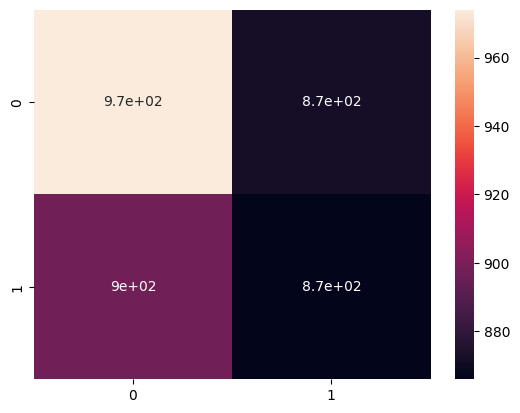

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
accuracy=accuracy_score(y_test,y_predict)

In [ ]:
accuracy

0.5098365198115822

In [11]:
#using TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 1: Load Data
data = pd.read_csv('/content/fake_news_dataset.csv')

# Step 2: Features and Labels
X = data['text']        # Must be TEXT (not numbers)
y = data['label']       # 0 or 1

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)  #  use .fit_transform on text
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

# Step 6: Predict
y_pred = lr.predict(X_test_vec)

# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.49825
              precision    recall  f1-score   support

        fake       0.51      0.50      0.50      2029
        real       0.49      0.50      0.50      1971

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
print("NB Accuracy:", nb.score(X_test_vec, y_test))


NB Accuracy: 0.51175
